****Columns Property Annotation using Schema.org terms (R2-SOTAB-CPA-SCH)****

1. Task Description:
    - This task is part of the "Semantic Web Challenge on Tabular Data to Knowledge Graph Matching" in ISWC 2023.
    - It is based on the WDC-SOTAB benchmark.
    - The goal is to annotate the relationship between the main column of a table and other columns using pre-defined terms from the Schema.org vocabulary.
    - It is a multi-class classification problem where each column pair can be annotated with only one label.
    - The set of pre-defined Schema.org terms consists of **105** terms listed in the "cpa_labels_round2.txt" file, such as telephone, ISBN, or description.
2. Annotation Instructions:
    - Annotate the relationship between the main column and other columns using terms from the "cpa_labels_round2.txt" file.
    - Prepare a CSV file for submission, where each line represents a relationship prediction.
    - The columns in the CSV should be named as follows: "table_name", "main_column_index", "column_index", "label".
    - The "table_name" column should include the full name of the table, including the extension (e.g., Product_corememoriesco.com_September2020_CPA.json.gz).
    - The "main_column_index" refers to the position of the main column in the table, and it is always at index 0 in the WDC-SOTAB benchmark.
    - The "column_index" refers to the position of the other column in the table, starting from 1 for non-main columns.
    - The "label" refers to the predicted relationship label, and each column pair should have only one predicted label.
3. Dataset and Files:
    - The necessary datasets and files can be found in the provided links.
    - The training set is available in the "sotab_cpa_train_round2.csv" file, which provides the table names, main column indices, column indices, and ground truth labels for each column pair.
    - The validation set is in the "sotab_cpa_validation_round2.csv" file, having the same structure as the training set.
    - To evaluate predictions on the validation set, you can use the "SOTAB_Evaluator.py" script with the command: **`python SOTAB_Evaluator.py /path/to/submission/file /path/to/ground/truth/file`**.
    - The test targets are provided in the "sotab_cpa_test_targets_round2.csv" file, which includes the table name, index of the main column, and target column index.
    - All tables are stored in JSON files, where each line represents a row in the table. Use the code snippet **`table_df = pd.read_json(path, compression='gzip', lines=True)`** to open a table.
    - The label set for prediction is stored in the "cpa_labels_round2.txt" file.
    
4. Evaluation Criteria:
    - Calculating Precision, Recall, Macro-F1 Score and Micro-F1 Score.    

In [3]:
import pandas as pd
import gzip
import json
import matplotlib.pyplot as plt
import os

In [4]:
# Read all 80 terms provided in cta_labels_round2.txt
file_path_terms = 'dataset\Round2-SOTAB-CPA-SCH-Datasets\cpa_labels_round2.txt'

with open(file_path_terms, 'r') as file:
    lines = file.readlines()

print(lines)

print(f'\n Totle number of terms in cpa_labels_round2.txt are : {len(lines)}')

['datePublished\n', 'price\n', 'inLanguage\n', 'url\n', 'priceCurrency\n', 'publisher\n', 'availability\n', 'author\n', 'numberOfPages\n', 'isbn\n', 'bookFormat\n', 'genre\n', 'copyrightYear\n', 'bestRating\n', 'worstRating\n', 'review\n', 'bookEdition\n', 'ratingValue\n', 'itemCondition\n', 'image\n', 'description\n', 'headline\n', 'text\n', 'startDate\n', 'endDate\n', 'location\n', 'organizer\n', 'performer\n', 'address\n', 'eventStatus\n', 'eventAttendanceMode\n', 'email\n', 'category\n', 'telephone\n', 'duration\n', 'checkInTime\n', 'checkoutTime\n', 'addressLocality\n', 'priceRange\n', 'addressCountry\n', 'streetAddress\n', 'addressRegion\n', 'longitude\n', 'latitude\n', 'postalCode\n', 'openingHours\n', 'currenciesAccepted\n', 'paymentAccepted\n', 'amenityFeature\n', 'availableLanguage\n', 'faxNumber\n', 'datePosted\n', 'jobTitle\n', 'employmentType\n', 'hiringOrganization\n', 'dayOfWeek\n', 'closes\n', 'opens\n', 'director\n', 'actor\n', 'productionCompany\n', 'contentRating\n',

In [5]:
# Read a sample file and sources residing in it : File name and data residing in it. 
file_path_gz = 'dataset/Round2-SOTAB-CPA-Tables/Round2-SOTAB-CPA-Tables/Book_11x17.pt_September2020_CPA.json.gz'  # Replace with the actual file path of your JSON file
df = pd.read_json(file_path_gz, lines=True, compression='gzip')

In [6]:
df.head()

,0,1,2,3
0,A Cidade Perdida,9789722539739,728,2020-07-10
1,A Cúpula - livro 1,9789722531924,704,2016-04-08
2,Misery,9789722527118,480,2013-09-13
3,A Cúpula - Livro 2,9789722532457,656,2016-08-05
4,O Olho de Deus,9789722537636,528,2019-05-10


In [7]:
# Read a sample file and sources residing in it : File name and data residing in it. 
file_path_gz_1 = 'dataset/Round2-SOTAB-CPA-Tables/Round2-SOTAB-CPA-Tables/Book_1jour-1jeu.com_September2020_CPA.json.gz'  # Replace with the actual file path of your JSON file
df_1 = pd.read_json(file_path_gz_1, lines=True, compression='gzip')

In [8]:
df_1.head()

,0,1,2,3,4,5,6,7,8,9,10
0,Escape Game: Junior - La Malédiction de la Momie,"With the help of your trusty robot Dooz, you h...",9782215168706,http://schema.org/Hardcover,48.0,2019-06-21,EUR,"[Rémi Prieur, Mélanie Vives]",13,0,4.4
1,Escape Game: Serial Killer,None,9782017095538,http://schema.org/Hardcover,128.0,2020-08-28,EUR,None,1,0,5.0
2,Escape Game: La Tour Noyée,Will you be able to escape from this adventure...,9782317019890,http://schema.org/Hardcover,44.0,2019-09-20,EUR,Alexis Moroz,43,0,3.9
3,Escape Game: Junior - Opération Pizza,"With the help of your trusty robot Dooz, you'v...",9782215168690,http://schema.org/Hardcover,48.0,2019-03-08,EUR,"[Rémi Prieur, Mélanie Vives]",13,0,4.4
4,EXIT: Le Livre - Journal de Bord 29,A book with a mystery to solve as you read it:...,9782017105824,http://schema.org/Hardcover,144.0,2019-10-02,EUR,Dimitri Chassapakis,244,0,3.9


In [9]:
# Reading the provided training, validation, and testing dataset
file_path_train = 'dataset\Round2-SOTAB-CPA-SCH-Datasets\sotab_cpa_train_round2.csv'
file_path_validate = 'dataset\Round2-SOTAB-CPA-SCH-Datasets\sotab_cpa_validation_round2.csv' 
file_path_test = 'dataset\Round2-SOTAB-CPA-SCH-Datasets\sotab_cpa_test_targets_round2.csv'

df_train = pd.read_csv(file_path_train)
df_validate = pd.read_csv(file_path_validate)
df_test = pd.read_csv(file_path_test)

print(f'\n Dimension of the train dataframe are {df_train.shape}')
print(f'\n Dimension of the validaiton dataframe are {df_validate.shape}')
print(f'\n Dimension of the test dataframe are {df_test.shape}')


 Dimension of the train dataframe are (97967, 4)

 Dimension of the validaiton dataframe are (1804, 4)

 Dimension of the test dataframe are (1623, 3)


In [10]:
print('Training dataset')
df_train.head()

Training dataset


,table_name,main_column_index,column_index,label
0,Book_11x17.pt_September2020_CPA.json.gz,0,3,datePublished
1,Book_11x17.pt_September2020_CPA.json.gz,0,1,isbn
2,Book_11x17.pt_September2020_CPA.json.gz,0,2,numberOfPages
3,Book_1jour-1jeu.com_September2020_CPA.json.gz,0,9,worstRating
4,Book_1jour-1jeu.com_September2020_CPA.json.gz,0,5,datePublished


In [11]:
print('Validaiton dataset')
df_validate.head()

Validaiton dataset


,table_name,main_column_index,column_index,label
0,Book_7sat.co.uk_September2020_CPA.json.gz,0,9,author
1,Book_7sat.co.uk_September2020_CPA.json.gz,0,2,bookFormat
2,Book_7sat.co.uk_September2020_CPA.json.gz,0,3,datePublished
3,Book_7sat.co.uk_September2020_CPA.json.gz,0,4,numberOfPages
4,Book_7sat.co.uk_September2020_CPA.json.gz,0,5,isbn


In [12]:
print('Test dataset')
df_test.head()

Test dataset


,table_name,main_column_index,column_index
0,Book_bccampus.ca_September2020_CPA.json.gz,0,3
1,Book_bccampus.ca_September2020_CPA.json.gz,0,4
2,Book_bccampus.ca_September2020_CPA.json.gz,0,2
3,Book_bccampus.ca_September2020_CPA.json.gz,0,5
4,Book_betweenthecovers.com_September2020_CPA.js...,0,4


### Functional Data Analysis (FDA) on Train dataset

In [13]:
# Look at the head of the train dataset
df_train.head()

,table_name,main_column_index,column_index,label
0,Book_11x17.pt_September2020_CPA.json.gz,0,3,datePublished
1,Book_11x17.pt_September2020_CPA.json.gz,0,1,isbn
2,Book_11x17.pt_September2020_CPA.json.gz,0,2,numberOfPages
3,Book_1jour-1jeu.com_September2020_CPA.json.gz,0,9,worstRating
4,Book_1jour-1jeu.com_September2020_CPA.json.gz,0,5,datePublished


In [14]:
print(f"Total number of samples in dataset are: {df_train.size}")
print(f"Total number of unique tables present in training dataset: {df_train['table_name'].nunique()}")
print(f"Total number of unique labels present in training dataset: {df_train['label'].nunique()}")

# print(f'Highest number of column idex is: {df_train["column_index"].max}')

Total number of samples in dataset are: 391868
Total number of unique tables present in training dataset: 27511
Total number of unique labels present in training dataset: 103


In [15]:
df_train['column_index'].max()

28

In [16]:
# Maximum number of column_index a table can have
maximum_no_of_column_by_table = df_train.groupby('table_name')['column_index'].max() + 1

In [17]:
maximum_no_of_column_by_table_to_df = maximum_no_of_column_by_table.reset_index()

In [18]:
maximum_no_of_column_by_table_to_df.head()

,table_name,column_index
0,Book_11x17.pt_September2020_CPA.json.gz,4
1,Book_1jour-1jeu.com_September2020_CPA.json.gz,10
2,Book_2014brazil.co.uk_September2020_CPA.json.gz,10
3,Book_24symbols.com_September2020_CPA.json.gz,6
4,Book_4thestate.co.uk_September2020_CPA.json.gz,7


In [19]:
value_counts = maximum_no_of_column_by_table_to_df['column_index'].value_counts().sort_index()

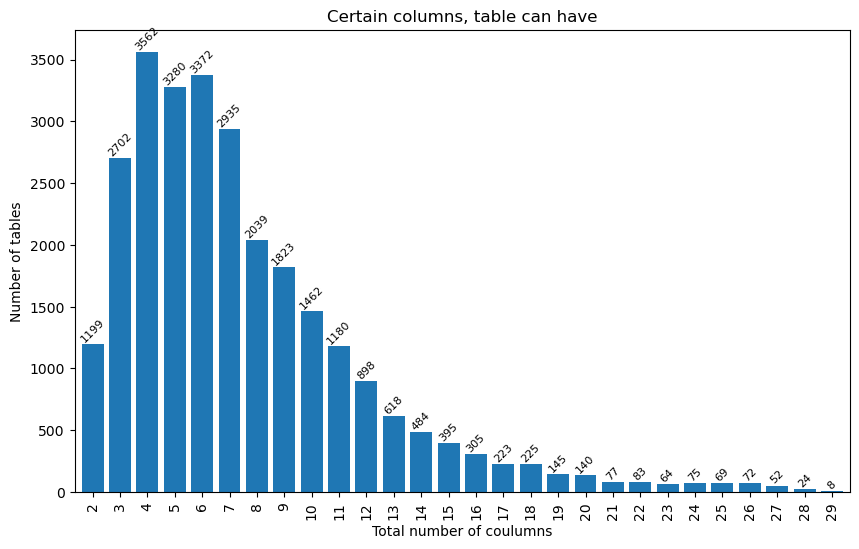

In [20]:
# setting a figure size
plt.figure(figsize=(10, 6))

# plotting the bar chart
ax = value_counts.plot(kind='bar', width=0.8)

# settting the labels and title
plt.xlabel('Total number of coulumns')
plt.ylabel('Number of tables')
plt.title('Certain columns, table can have')

# Add count values on top of each bar
for i, v in enumerate(value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom', rotation=45, fontsize=8)

# displaying the chart
plt.show()

# # Print the value counts
# print("Value Counts:")
# print(value_counts)

In [32]:
# Create a sample with labels which occures atleast 2 or 3 times

# Make a groupby with the specific column --> here it is label
grouped = df_train.groupby('label')
grouped

In [33]:
# Capturing specific raws which can be processed on the machine

# df_train_5 = df_train[:1000]
df_train_5 = grouped.apply(lambda x: x.sample(n=3))
df_train_5 = df_train_5.reset_index(drop=True)

In [34]:
# df_train_5 = df_train[:20]

In [35]:
df_train_5.head()

,table_name,main_column_index,column_index,label
0,Movie_yts-torrent.net_September2020_CPA.json.gz,0,9,actor
1,Movie_zomraa.com_September2020_CPA.json.gz,0,9,actor
2,Movie_watchsomuch.org_September2020_CPA.json.gz,0,6,actor
3,LocalBusiness_hooversun.com_September2020_CPA....,0,1,address
4,Hotel_greenparkpattaya.com_September2020_CPA.j...,0,1,address


In [36]:
# preparing the input file for the ML purpose

# Path to the folder where the tables are stored

folder_path = 'dataset/Round2-SOTAB-CPA-Tables/Round2-SOTAB-CPA-Tables/'

# A column 'data_value' will work as a input dataset to our model
df_train_5['main_column_value'] = None
df_train_5['other_column_value'] = None


# Iterate over each row in the dataframe
for index, row in df_train_5.iterrows():
    table_name = row['table_name']
    main_column_name = row['main_column_index']
    other_column_name = row['column_index']
    
    # Check if the table file exists in the folder
    table_file_path = os.path.join(folder_path, table_name)  # Assuming the tables are stored as CSV files
    
    if os.path.isfile(table_file_path):
        # Load the table file into a dataframe
        table_df = pd.read_json(table_file_path, lines=True, compression='gzip')
        
        # Check if the column exists in the table dataframe
        if main_column_name in table_df.columns and other_column_name in table_df.columns:
            # Fetch the column data
            other_column_data = table_df[other_column_name]
            main_column_data = table_df[main_column_name]
            
            # Assign the column data to the 'data_value' column in the original dataframe
            df_train_5.at[index, 'main_column_value'] = main_column_data.tolist()
            df_train_5.at[index, 'other_column_value'] = other_column_data.tolist()

        else:
            print(f"Column '{other_column_name}' and '{main_column_name}'does not exist in table '{table_name}'.")
    else:
        print(f"Table '{table_name}' does not exist in the folder.")

In [37]:
df_train_5.head()

,table_name,main_column_index,column_index,label,main_column_value,other_column_value
0,Movie_yts-torrent.net_September2020_CPA.json.gz,0,9,actor,"[The Lost Husband (2020), John Henry (2020), D...","[[Nora Dunn, Kevin Alejandro, Georgia King, Le..."
1,Movie_zomraa.com_September2020_CPA.json.gz,0,9,actor,"[Integrity (2019), Gretel & Hansel (2020), Art...","[Johnny Depp, Johnny Depp, Johnny Depp, Johnny..."
2,Movie_watchsomuch.org_September2020_CPA.json.gz,0,6,actor,"[Country Christmas Album (2018), Wheelman (201...","[[Chad Finton, Nora Harriet Aossey, Karm Parke..."
3,LocalBusiness_hooversun.com_September2020_CPA....,0,1,address,"[Lee Branch Shopping Center, Barber Motorsport...","[611 Doug Baker Blvd, Hoover, Alabama 35242, 6..."
4,Hotel_greenparkpattaya.com_September2020_CPA.j...,0,1,address,[Frequently Asked Questions - The Green Park R...,"[240/5 Moo 5 Soi Ping Pa, North Pattaya, Chonb..."


In [38]:
df_train_5.columns

Index(['table_name', 'main_column_index', 'column_index', 'label',
       'main_column_value', 'other_column_value'],
      dtype='object')

In [39]:
df_train_5_explod = df_train_5.explode('main_column_value')
# df_train_5_explod = df_train_5.explode('main_column_value', ignore_index=True).apply(pd.Series.explode)

In [40]:
df_train_5_explod

,table_name,main_column_index,column_index,label,main_column_value,other_column_value
0,Movie_yts-torrent.net_September2020_CPA.json.gz,0,9,actor,The Lost Husband (2020),"[[Nora Dunn, Kevin Alejandro, Georgia King, Le..."
0,Movie_yts-torrent.net_September2020_CPA.json.gz,0,9,actor,John Henry (2020),"[[Nora Dunn, Kevin Alejandro, Georgia King, Le..."
0,Movie_yts-torrent.net_September2020_CPA.json.gz,0,9,actor,"Dark, Almost Night (2019)","[[Nora Dunn, Kevin Alejandro, Georgia King, Le..."
0,Movie_yts-torrent.net_September2020_CPA.json.gz,0,9,actor,You Don't Nomi (2019),"[[Nora Dunn, Kevin Alejandro, Georgia King, Le..."
0,Movie_yts-torrent.net_September2020_CPA.json.gz,0,9,actor,Raya and the Last Dragon (2021),"[[Nora Dunn, Kevin Alejandro, Georgia King, Le..."
...,...,...,...,...,...,...
308,Product_ooohshinythings.com_September2020_CPA....,0,6,worstRating,Ring Bundle - Brightest of the Rosy Bright,"[nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, ..."
308,Product_ooohshinythings.com_September2020_CPA....,0,6,worstRating,Organza Bags Silver Coloured Stars 10 Pack,"[nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, ..."
308,Product_ooohshinythings.com_September2020_CPA....,0,6,worstRating,Big Bad Cobra,"[nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, ..."
308,Product_ooohshinythings.com_September2020_CPA....,0,6,worstRating,DIY Charms Kit,"[nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, ..."


In [41]:
df_train_5_explod['other_column_value'] = df_train_5['other_column_value'].explode()

In [42]:
df_train_5_explod = df_train_5_explod.reset_index(drop=True)
df_train_5_explod

,table_name,main_column_index,column_index,label,main_column_value,other_column_value
0,Movie_yts-torrent.net_September2020_CPA.json.gz,0,9,actor,The Lost Husband (2020),"[Nora Dunn, Kevin Alejandro, Georgia King, Les..."
1,Movie_yts-torrent.net_September2020_CPA.json.gz,0,9,actor,John Henry (2020),"[Tyler Alvarez, Joseph Julian Soria, Jamila Ve..."
2,Movie_yts-torrent.net_September2020_CPA.json.gz,0,9,actor,"Dark, Almost Night (2019)","[Roma Gąsiorowska, Aleksandra Konieczna, Eliza..."
3,Movie_yts-torrent.net_September2020_CPA.json.gz,0,9,actor,You Don't Nomi (2019),"[April Kidwell, Jeffrey Conway, Gina Gershon, ..."
4,Movie_yts-torrent.net_September2020_CPA.json.gz,0,9,actor,Raya and the Last Dragon (2021),"[Awkwafina, Kelly Marie Tran]"
...,...,...,...,...,...,...
90709,Product_ooohshinythings.com_September2020_CPA....,0,6,worstRating,Ring Bundle - Brightest of the Rosy Bright,NaN
90710,Product_ooohshinythings.com_September2020_CPA....,0,6,worstRating,Organza Bags Silver Coloured Stars 10 Pack,NaN
90711,Product_ooohshinythings.com_September2020_CPA....,0,6,worstRating,Big Bad Cobra,NaN
90712,Product_ooohshinythings.com_September2020_CPA....,0,6,worstRating,DIY Charms Kit,NaN


In [43]:
df_train_5_explod_ml = df_train_5_explod[['main_column_value','other_column_value','label']]
df_train_5_explod_ml.head()

,main_column_value,other_column_value,label
0,The Lost Husband (2020),"[Nora Dunn, Kevin Alejandro, Georgia King, Les...",actor
1,John Henry (2020),"[Tyler Alvarez, Joseph Julian Soria, Jamila Ve...",actor
2,"Dark, Almost Night (2019)","[Roma Gąsiorowska, Aleksandra Konieczna, Eliza...",actor
3,You Don't Nomi (2019),"[April Kidwell, Jeffrey Conway, Gina Gershon, ...",actor
4,Raya and the Last Dragon (2021),"[Awkwafina, Kelly Marie Tran]",actor


In [44]:
df_train_5_explod_ml['main_column_value'] = df_train_5_explod_ml['main_column_value'].astype(str)
df_train_5_explod_ml['other_column_value'] = df_train_5_explod_ml['other_column_value'].astype(str)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5064\1972517104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_5_explod_ml['main_column_value'] = df_train_5_explod_ml['main_column_value'].astype(str)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5064\1972517104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_5_explod_ml['other_column_value'] = df_train_5_explod_ml['other_column_value'].astype(str)


### ML implementation

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from scipy.sparse import hstack

In [46]:
df_train_5_explod_ml['label'].nunique()

103

In [47]:
unique_labels = df_train_5_explod_ml['label'].unique()
print(unique_labels)

['actor' 'address' 'addressCountry' 'addressLocality' 'addressRegion'
 'alumniOf' 'amenityFeature' 'author' 'availability'
 'availableDeliveryMethod' 'availableLanguage' 'awayTeam' 'bestRating'
 'birthDate' 'birthPlace' 'bookEdition' 'bookFormat' 'brand' 'byArtist'
 'category' 'checkInTime' 'checkoutTime' 'closes' 'color' 'contentRating'
 'cookTime' 'cookingMethod' 'copyrightYear' 'countryOfOrigin'
 'currenciesAccepted' 'datePosted' 'datePublished' 'dayOfWeek' 'deathDate'
 'description' 'director' 'duration' 'email' 'employmentType' 'endDate'
 'episodeNumber' 'eventAttendanceMode' 'eventStatus' 'familyName'
 'faxNumber' 'gender' 'genre' 'givenName' 'gtin' 'headline'
 'hiringOrganization' 'homeTeam' 'honorificSuffix' 'image' 'inAlbum'
 'inLanguage' 'isbn' 'itemCondition' 'jobTitle' 'latitude' 'location'
 'longitude' 'manufacturer' 'material' 'model' 'nationality' 'numTracks'
 'numberOfPages' 'openingHours' 'opens' 'organizer' 'partOfSeries'
 'paymentAccepted' 'performer' 'postalCode' 'p

In [48]:
# Split the dataset into training and testing datasets
X = df_train_5_explod_ml[['main_column_value', 'other_column_value']]
y = df_train_5_explod_ml['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df_train_5_explod_ml['label'], random_state=42)


In [50]:
# Feature extraction
vectorizer = TfidfVectorizer()
X_train_main = vectorizer.fit_transform(X_train['main_column_value'])
X_train_other = vectorizer.transform(X_train['other_column_value'])

X_test_main = vectorizer.transform(X_test['main_column_value'])
X_test_other = vectorizer.transform(X_test['other_column_value'])


X_train_vectorized = hstack([X_train_main, X_train_other])
X_test_vectorized = hstack([X_test_main, X_test_other])

In [51]:
print(X_train_vectorized.shape)
print(X_test_vectorized.shape)

(72571, 89178)
(18143, 89178)


In [52]:
X_train_vectorized[15]

<1x89178 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [53]:
# Create a logistic regression model
model = LogisticRegression()

In [54]:
print(X_train_vectorized.shape)

(72571, 89178)


In [55]:
# Train the model on the training data
model.fit(X_train_vectorized, y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
# Model evaluation
y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8942291792978008


In [57]:
# Calculate precision, recall, and F1 score
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision_macro}")
print(f"Recall: {recall_macro}")
print(f"F1 score: {f1_macro}")

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.9177739095599577
Recall: 0.7235252935229154
F1 score: 0.7801185436610323


In [58]:
report = classification_report(y_test, y_pred)
print(report)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

                  actor       0.87      0.86      0.86       121
                address       1.00      0.81      0.89        21
         addressCountry       0.95      1.00      0.98        40
        addressLocality       0.93      0.76      0.84       201
          addressRegion       1.00      1.00      1.00        18
               alumniOf       1.00      0.12      0.22         8
         amenityFeature       1.00      1.00      1.00        24
                 author       0.95      0.89      0.92       261
           availability       0.78      0.93      0.85       140
availableDeliveryMethod       0.97      1.00      0.98       192
      availableLanguage       1.00      1.00      1.00        10
               awayTeam       0.94      0.98      0.96       169
             bestRating       0.90      0.79      0.84       242
              birthDate       1.00      0.58      0.74        67
             birthPlace 

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Preparing the submission files for the competition

In [119]:
df_test_4 = df_test[:]

In [120]:
df_test_4 

,table_name,main_column_index,column_index
0,Book_bccampus.ca_September2020_CPA.json.gz,0,3
1,Book_bccampus.ca_September2020_CPA.json.gz,0,4
2,Book_bccampus.ca_September2020_CPA.json.gz,0,2
3,Book_bccampus.ca_September2020_CPA.json.gz,0,5
4,Book_betweenthecovers.com_September2020_CPA.js...,0,4
...,...,...,...
1618,TVEpisode_solarmovie.app_September2020_CPA.jso...,0,1
1619,TVEpisode_solarmovie.app_September2020_CPA.jso...,0,3
1620,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,3
1621,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,1


In [121]:
# preparing the input file for the ML purpose

# Path to the folder where the tables are stored

folder_path = 'dataset/Round2-SOTAB-CPA-Tables/Round2-SOTAB-CPA-Tables/'

# A column 'data_value' will work as a input dataset to our model
df_test_4['main_column_value'] = None
df_test_4['other_column_value'] = None


# Iterate over each row in the dataframe
for index, row in df_test_4.iterrows():
    table_name = row['table_name']
    main_column_name = row['main_column_index']
    other_column_name = row['column_index']
    
    # Check if the table file exists in the folder
    table_file_path = os.path.join(folder_path, table_name)  # Assuming the tables are stored as CSV files
    
    if os.path.isfile(table_file_path):
        # Load the table file into a dataframe
        table_df = pd.read_json(table_file_path, lines=True, compression='gzip')
        
        # Check if the column exists in the table dataframe
        if main_column_name in table_df.columns and other_column_name in table_df.columns:
            # Fetch the column data
            other_column_data = table_df[other_column_name]
            main_column_data = table_df[main_column_name]
            
            # Assign the column data to the 'data_value' column in the original dataframe
            df_test_4.at[index, 'main_column_value'] = main_column_data.tolist()
            df_test_4.at[index, 'other_column_value'] = other_column_data.tolist()

        else:
            print(f"Column '{other_column_name}' and '{main_column_name}'does not exist in table '{table_name}'.")
    else:
        print(f"Table '{table_name}' does not exist in the folder.")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11700\2975317613.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_4['main_column_value'] = None
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11700\2975317613.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_4['other_column_value'] = None


In [122]:
print(df_test_4.iloc[0,0])
df_test_4

Book_bccampus.ca_September2020_CPA.json.gz


,table_name,main_column_index,column_index,main_column_value,other_column_value
0,Book_bccampus.ca_September2020_CPA.json.gz,0,3,[Vital Sign Measurement Across the Lifespan - ...,"[[Posted:, 2018-04-12T09:49:42.230-07:00], [Po..."
1,Book_bccampus.ca_September2020_CPA.json.gz,0,4,[Vital Sign Measurement Across the Lifespan - ...,"[$0.00, $0.00, $0.00, $0.00, $0.00, $0.00, $0...."
2,Book_bccampus.ca_September2020_CPA.json.gz,0,2,[Vital Sign Measurement Across the Lifespan - ...,"[eng, eng, eng, eng, eng, eng, eng, eng, eng, ..."
3,Book_bccampus.ca_September2020_CPA.json.gz,0,5,[Vital Sign Measurement Across the Lifespan - ...,[http://solr.bccampus.ca:8001/bcc/items/feacda...
4,Book_betweenthecovers.com_September2020_CPA.js...,0,4,"[The Dancer from Atlantis, A Christmas Garland...","[USD, USD, USD, USD, USD, USD, USD, USD, USD, ..."
...,...,...,...,...,...
1618,TVEpisode_solarmovie.app_September2020_CPA.jso...,0,1,"[Salva El Tigre, Pimemento, Jim Carrey, Chapte...","[While celebrating his 40th birthday, Félix wo..."
1619,TVEpisode_solarmovie.app_September2020_CPA.jso...,0,3,"[Salva El Tigre, Pimemento, Jim Carrey, Chapte...","[Narcos: Mexico, Brooklyn Nine-Nine, Lights Ou..."
1620,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,3,"[Veal with Chef Rene Rodriguez, A King Who Lik...","[3, 10, 4, 9, 2, 1, 3, 1, 6, 4, 2, 1, 7, 3, 2,..."
1621,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,1,"[Veal with Chef Rene Rodriguez, A King Who Lik...",[Chef Rene Rodriguez makes mouth-watering porc...


In [123]:
# # Read a sample file and sources residing in it : File name and data residing in it. 
# file_path_gz = 'dataset/Round2-SOTAB-CTA-Tables/CreativeWork_2agenten.com_September2020_CTA.json.gz'  # Replace with the actual file path of your JSON file
# df = pd.read_json(file_path_gz, lines=True, compression='gzip')

In [124]:
# df_test_4 = df_test_4.explode('main_column_value')
df_test_4_explod = df_test_4.explode('main_column_value')

In [125]:
df_test_4_explod

,table_name,main_column_index,column_index,main_column_value,other_column_value
0,Book_bccampus.ca_September2020_CPA.json.gz,0,3,Vital Sign Measurement Across the Lifespan - 1...,"[[Posted:, 2018-04-12T09:49:42.230-07:00], [Po..."
0,Book_bccampus.ca_September2020_CPA.json.gz,0,3,BC Reads: Adult Literacy Fundamental English -...,"[[Posted:, 2018-04-12T09:49:42.230-07:00], [Po..."
0,Book_bccampus.ca_September2020_CPA.json.gz,0,3,Provisional Prosthodontic series - 2nd Edition,"[[Posted:, 2018-04-12T09:49:42.230-07:00], [Po..."
0,Book_bccampus.ca_September2020_CPA.json.gz,0,3,Introduction to Psychology - 1st Canadian Edition,"[[Posted:, 2018-04-12T09:49:42.230-07:00], [Po..."
0,Book_bccampus.ca_September2020_CPA.json.gz,0,3,BC Reads: Adult Literacy Fundamental English -...,"[[Posted:, 2018-04-12T09:49:42.230-07:00], [Po..."
...,...,...,...,...,...
1622,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,Australian Spartan,"[Cook Like a Chef, The Wiggles' World, The Lum..."
1622,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,Camera Wheelbarrow Tiger Pillow,"[Cook Like a Chef, The Wiggles' World, The Lum..."
1622,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,Spiky Gold Hunters,"[Cook Like a Chef, The Wiggles' World, The Lum..."
1622,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,All Eyes on Me,"[Cook Like a Chef, The Wiggles' World, The Lum..."


In [126]:
# df_test_4_explod = df_test_4.explode('other_column_value')

In [127]:
df_test_4_explod['other_column_value'] = df_test_4['other_column_value'].explode()

In [128]:
df_test_4_explod = df_test_4_explod.reset_index(drop=True)
df_test_4_explod

,table_name,main_column_index,column_index,main_column_value,other_column_value
0,Book_bccampus.ca_September2020_CPA.json.gz,0,3,Vital Sign Measurement Across the Lifespan - 1...,"[Posted:, 2018-04-12T09:49:42.230-07:00]"
1,Book_bccampus.ca_September2020_CPA.json.gz,0,3,BC Reads: Adult Literacy Fundamental English -...,"[Posted:, 2015-10-29T14:31:06.827-07:00]"
2,Book_bccampus.ca_September2020_CPA.json.gz,0,3,Provisional Prosthodontic series - 2nd Edition,"[2018-05-17T08:46:10.710-07:00, Posted:]"
3,Book_bccampus.ca_September2020_CPA.json.gz,0,3,Introduction to Psychology - 1st Canadian Edition,"[2014-10-16T15:56:26.847-07:00, Posted:]"
4,Book_bccampus.ca_September2020_CPA.json.gz,0,3,BC Reads: Adult Literacy Fundamental English -...,"[Posted:, 2015-11-02T13:57:41.977-08:00]"
...,...,...,...,...,...
593486,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,Australian Spartan,Spartan
593487,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,Camera Wheelbarrow Tiger Pillow,Watch Emergence
593488,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,Spiky Gold Hunters,Watch Spiky Gold Hunters
593489,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,All Eyes on Me,Colonial Combat


In [129]:
## Letter on please look into in detail and try to figure out the problem with the null values

# Count the NaN values in each column
nan_count_column = df_test_4_explod.isna().sum()
print(nan_count_column)

table_name                0
main_column_index         0
column_index              0
main_column_value       529
other_column_value    52120
dtype: int64


In [130]:
# X_test_test = df_test_4_explod['other_column_value']

X_test_test = df_test_4_explod[['main_column_value', 'other_column_value']]

print(type(X_test_test))
# print(X_test_test[1])

<class 'pandas.core.frame.DataFrame'>


In [131]:
## Following code was giving a memory error henceforth we have used """hstack from scipy to solve the problem"""

# X_test_test_main = vectorizer.transform([str(x).lower() for x in X_test_test['main_column_value']])
# X_test_test_other = vectorizer.transform([str(x).lower() for x in X_test_test['other_column_value']])

# # Fit the vectorizer on the training data and transform the training and testing data
# # X_test_test_vec = vectorizer.transform(X_test_test)
# # X_test_test_main = vectorizer.transform(X_test_test['main_column_value'])
# # X_test_test_other = vectorizer.transform(X_test_test['other_column_value'])

# # Concatenate the features
# # X_train_vectorized = pd.concat([pd.DataFrame(X_train_main.toarray()), pd.DataFrame(X_train_other.toarray())], axis=1)
# X_test_test_vectorized = pd.concat([pd.DataFrame(X_test_test_main.toarray()), pd.DataFrame(X_test_test_other.toarray())], axis=1)

In [132]:
X_test_test_main = vectorizer.transform([str(x).lower() for x in X_test_test['main_column_value']])
X_test_test_other = vectorizer.transform([str(x).lower() for x in X_test_test['other_column_value']])

# Concatenate the sparse matrices directly
X_test_test_vectorized = hstack([X_test_test_main, X_test_test_other])


In [133]:
print(X_test_test_vectorized.shape)
print(X_train_vectorized.shape)

(593491, 103914)
(73464, 103914)


In [134]:
# Make predictions on the test_test data
y_pred_test = model.predict(X_test_test_vectorized)

In [135]:
print(y_pred_test.shape)
print(type(y_pred_test))

(593491,)
<class 'numpy.ndarray'>


In [136]:
# Convert the NumPy array to a DataFrame
y_pred_test_df = pd.DataFrame({'label': y_pred_test})

# Concatenate the original DataFrame and the array DataFrame along the column axis
PAAV_SCH_R2CPA = pd.concat([df_test_4_explod, y_pred_test_df], axis=1)

In [137]:
PAAV_SCH_R2CPA 

,table_name,main_column_index,column_index,main_column_value,other_column_value,label
0,Book_bccampus.ca_September2020_CPA.json.gz,0,3,Vital Sign Measurement Across the Lifespan - 1...,"[Posted:, 2018-04-12T09:49:42.230-07:00]",releaseDate
1,Book_bccampus.ca_September2020_CPA.json.gz,0,3,BC Reads: Adult Literacy Fundamental English -...,"[Posted:, 2015-10-29T14:31:06.827-07:00]",birthDate
2,Book_bccampus.ca_September2020_CPA.json.gz,0,3,Provisional Prosthodontic series - 2nd Edition,"[2018-05-17T08:46:10.710-07:00, Posted:]",datePublished
3,Book_bccampus.ca_September2020_CPA.json.gz,0,3,Introduction to Psychology - 1st Canadian Edition,"[2014-10-16T15:56:26.847-07:00, Posted:]",bookEdition
4,Book_bccampus.ca_September2020_CPA.json.gz,0,3,BC Reads: Adult Literacy Fundamental English -...,"[Posted:, 2015-11-02T13:57:41.977-08:00]",opens
...,...,...,...,...,...,...
593486,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,Australian Spartan,Spartan,bookEdition
593487,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,Camera Wheelbarrow Tiger Pillow,Watch Emergence,bookEdition
593488,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,Spiky Gold Hunters,Watch Spiky Gold Hunters,bookEdition
593489,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,All Eyes on Me,Colonial Combat,bookEdition


In [138]:
PAAV_SCH_R2CPA_SUB = PAAV_SCH_R2CPA[['table_name','main_column_index','column_index', 'label']]
PAAV_SCH_R2CPA_SUB

,table_name,main_column_index,column_index,label
0,Book_bccampus.ca_September2020_CPA.json.gz,0,3,releaseDate
1,Book_bccampus.ca_September2020_CPA.json.gz,0,3,birthDate
2,Book_bccampus.ca_September2020_CPA.json.gz,0,3,datePublished
3,Book_bccampus.ca_September2020_CPA.json.gz,0,3,bookEdition
4,Book_bccampus.ca_September2020_CPA.json.gz,0,3,opens
...,...,...,...,...
593486,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,bookEdition
593487,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,bookEdition
593488,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,bookEdition
593489,TVEpisode_tvnz.co.nz_September2020_CPA.json.gz,0,2,bookEdition


In [139]:
# Group by 'table_name' and 'column_index', and find the label that occurred the maximum times
PAAV_SCH_R2CPA_SUB = PAAV_SCH_R2CPA_SUB.groupby(['table_name', 'main_column_index', 'column_index'])['label'].apply(lambda x: x.value_counts().idxmax()).reset_index()

In [140]:
PAAV_SCH_R2CPA_SUB.head()

,table_name,main_column_index,column_index,label
0,Book_bccampus.ca_September2020_CPA.json.gz,0,2,inLanguage
1,Book_bccampus.ca_September2020_CPA.json.gz,0,3,opens
2,Book_bccampus.ca_September2020_CPA.json.gz,0,4,opens
3,Book_bccampus.ca_September2020_CPA.json.gz,0,5,bookEdition
4,Book_betweenthecovers.com_September2020_CPA.js...,0,2,bookEdition


In [141]:
# Get the unique values of the column in both DataFrames
unique_values_df_test = set(df_test['table_name'])
unique_values_PAAV_SCH_R2CPA_SUB = set(PAAV_SCH_R2CPA_SUB['table_name'])

# Check if the unique values are the same
if unique_values_df_test == unique_values_PAAV_SCH_R2CPA_SUB:
    print("The DataFrames have the same set of values in the 'table_name' column.")
else:
    print("The DataFrames do not have the same set of values in the 'table_name' column.")
    
    
# Checking the shape of the file 
print(f"The shpae of the generated file is :{PAAV_SCH_R2CPA_SUB.shape} ")    

The DataFrames have the same set of values in the 'table_name' column.
The shpae of the generated file is :(1622, 4) 


In [147]:
# Save the DataFrame as a CSV file
PAAV_SCH_R2CPA_SUB.to_csv('DREIFLUSS_sotab_cpa_test_targets_round2_R2-SOTAB-CPA-SCH.csv', index=False)